In this problem we are predicting the price of the car based on given features in the dataset.

In [1]:
'''
Created on 02/July/2020
-----------------------
@author Rohit Sharma
'''
#import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#read data
data = pd.read_csv('car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Data Preprocessing/Cleaning

In [3]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [4]:
# check the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
#check null or missing values
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
#check the shape of the data.
data.shape

(301, 9)

In this we have four categorical vaiables i.e. `'Seller_Type'`, `'Transmission'`, `'Owner'`, `'Fuel_Type'`. Check catagories of these catagorical variables.

In [7]:
data['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [8]:
data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [9]:
data['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [10]:
data['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In our dataset there is a feature called `'Year'`. Whenever we have this kind of features we have to create more features out from that. Therefore we can get more information about the data. <br>Here we are creating new feature called `'Current_year'` and then subtract `'Year'` from `'Current_year'` so that we can get the number of years. This will show how much old your car is?

In [11]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [12]:
#skip 'Car_name' because it does not play the important role because of there are many no of cars preaent in this world.
final_data = data[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [13]:
final_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [14]:
#create new feature called 'Current_year'.
final_data['Current_year']=2020

In [15]:
final_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [16]:
#subtraction
final_data['No_of_years'] = final_data['Current_year'] - final_data['Year']
final_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,No_of_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [17]:
#drop the 'Year' column
final_data.drop(['Year'], axis=1, inplace=True)
final_data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,No_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [18]:
#drop 'Current_year' column
final_data.drop(['Current_year'], axis=1, inplace=True)
final_data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


Now convert the categorical feature into some other values. For that we used `get_dummies` form pandas.

In [19]:
# feature are converted into one hot encoding format.
final_data = pd.get_dummies(final_data, drop_first=True)

In [20]:
final_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


Here `CNG`  is not showing or has been droped, because of to prvent it from dummy variable trap. <br>
**Example:-**<br>
    |CNG | Diseal | Petrol|
    ------------------------
      1       0        0
      0       1        0
      0       0        1
    
Now here `CNG` is dummy. If we consider `diseal` and `petrol` as **0, 0** this means it blongs to `CNG` and so on. 

**Now we find the correlation.**

In [21]:
final_data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No_of_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


It shows how one feature is corelated with other feature.

# Data Visualization

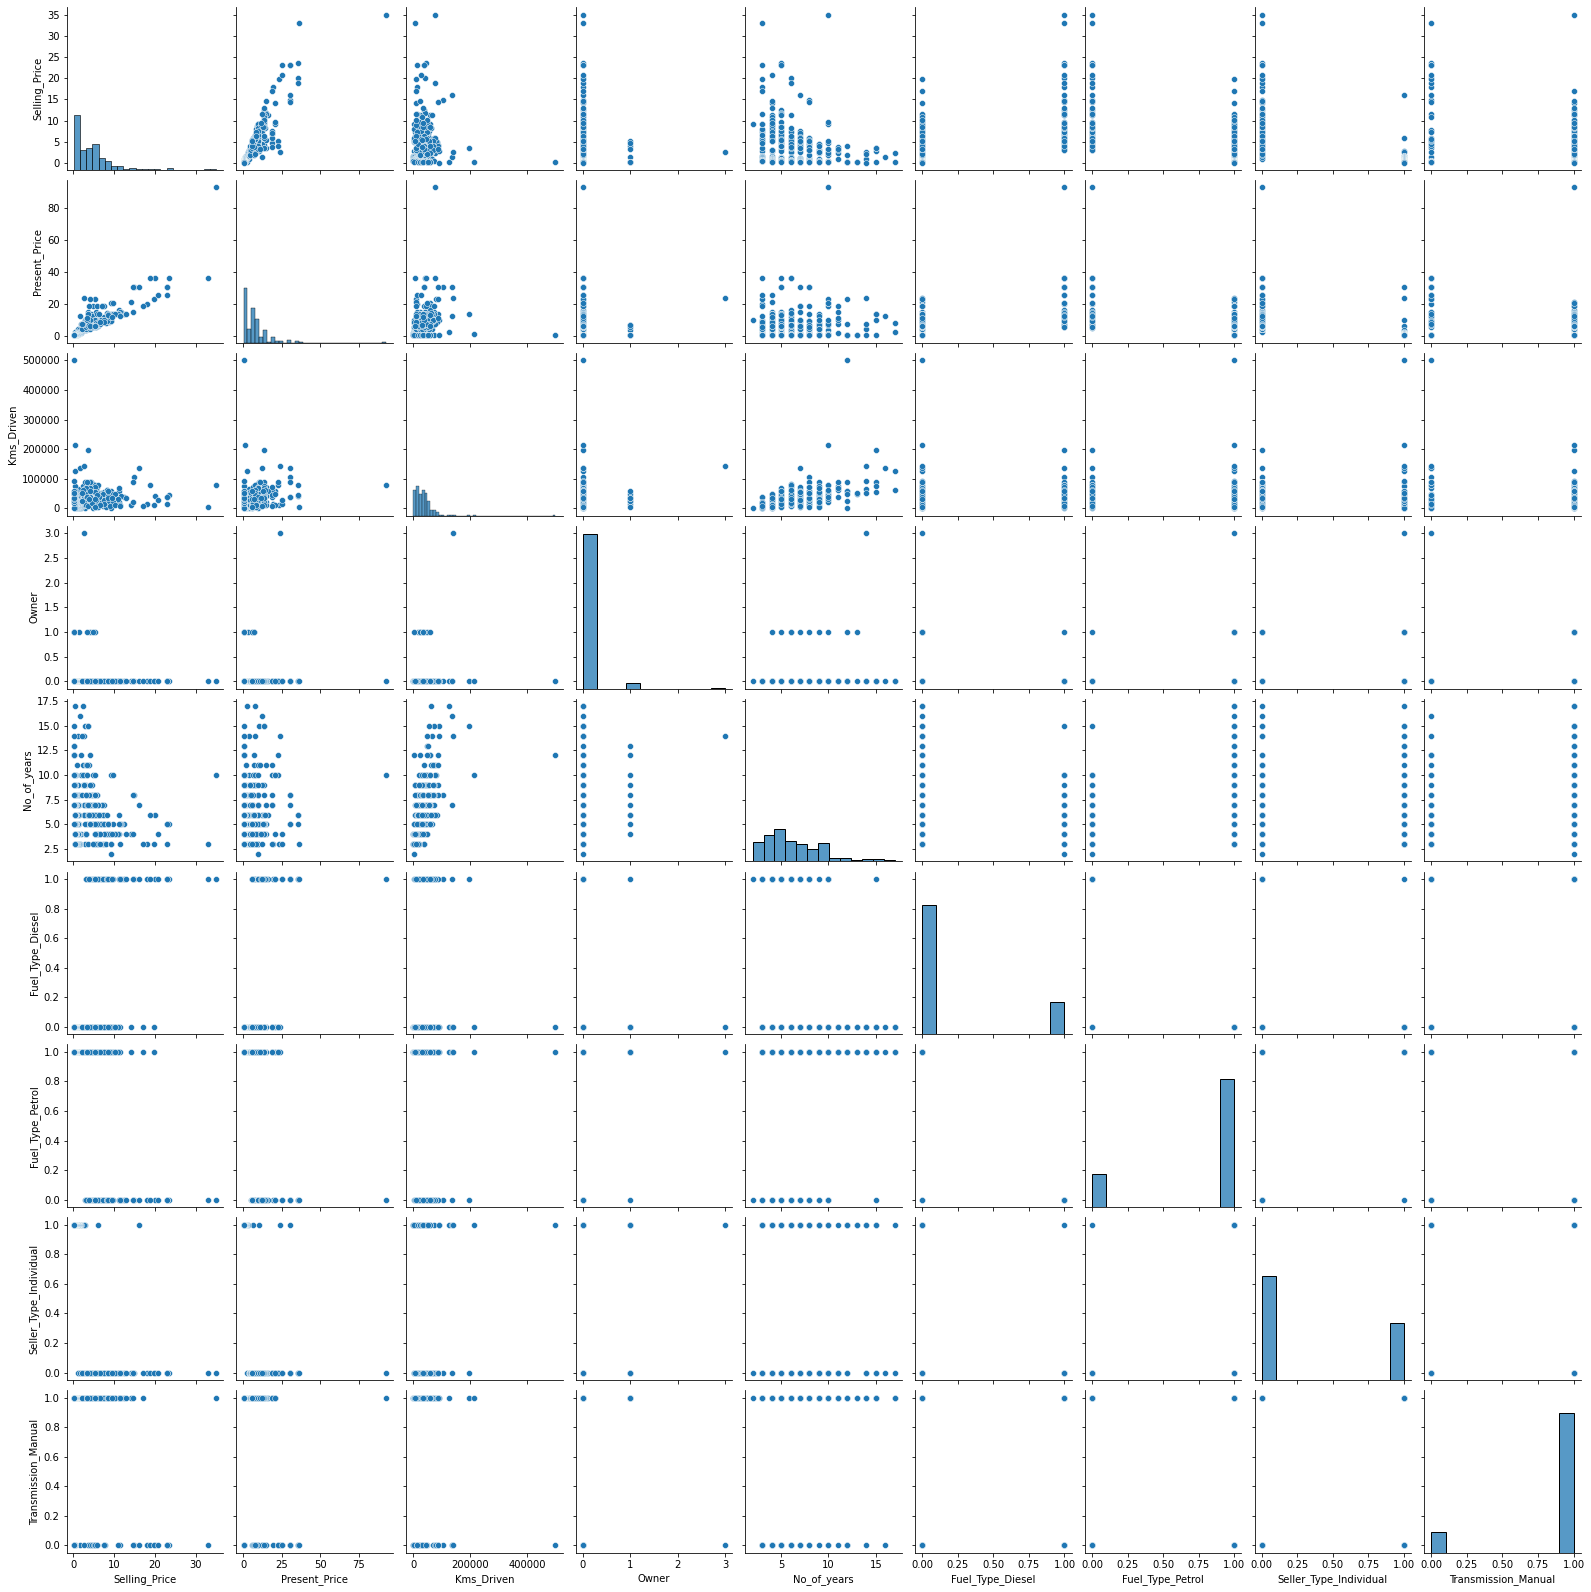

In [22]:
sns.pairplot(final_data)

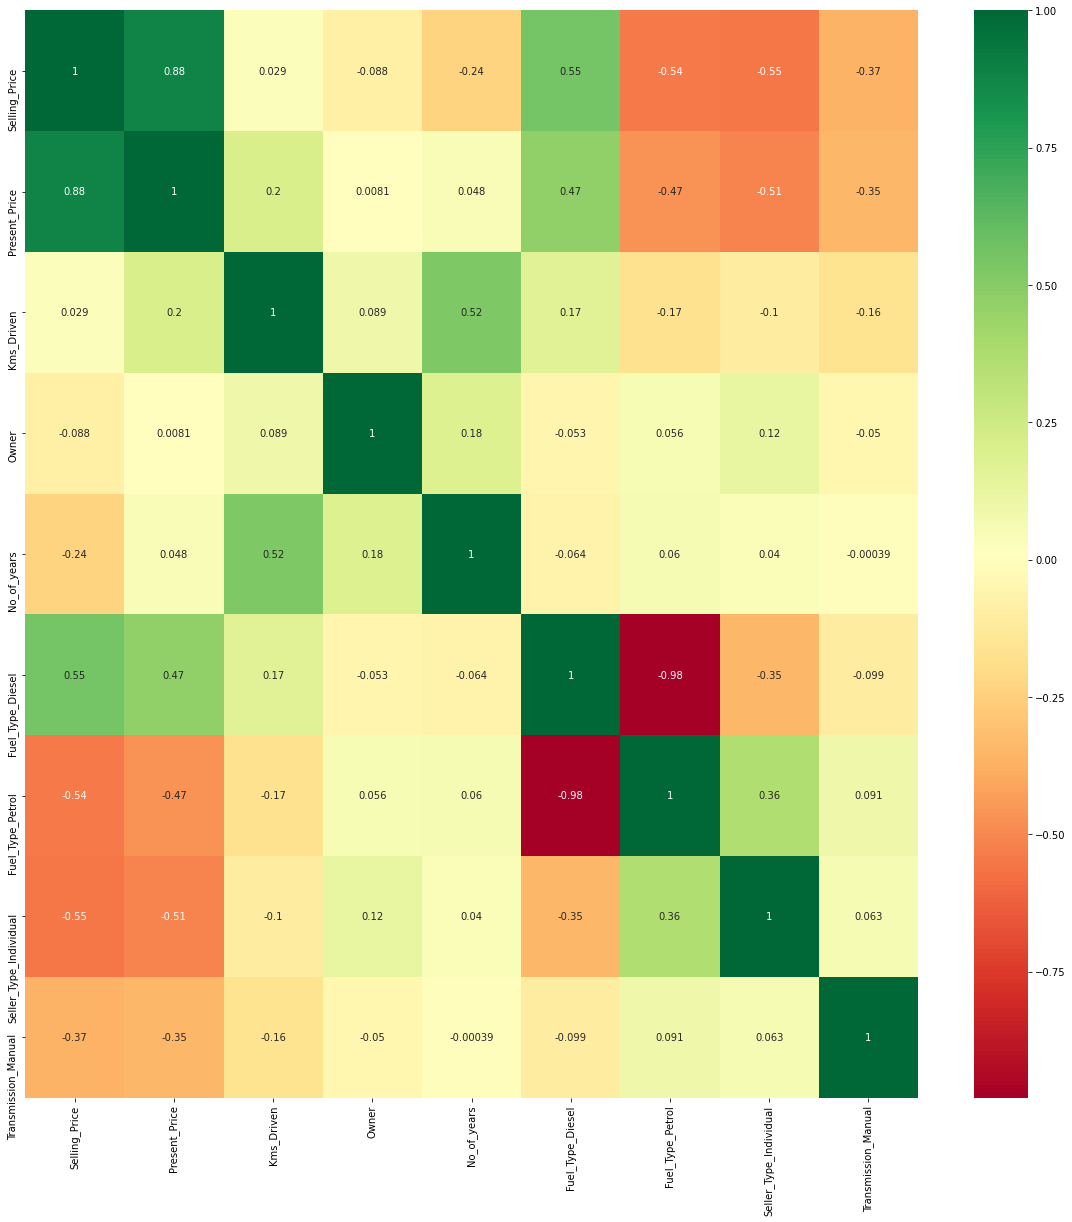

In [23]:
corrmat = final_data.corr()
top_cor_features = corrmat.index
plt.figure(figsize=(20,20))
#plot the heatmap
hmap = sns.heatmap(final_data[top_cor_features].corr(), annot=True, cmap="RdYlGn") #cmap="RdYlGn" for styling the heatmap.

This shows the correlation graphically.

In [24]:
final_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [25]:
#Dependent and Independent features.
X = final_data.iloc[:,1:]
y = final_data.iloc[:,0]

In [26]:
X.head()

,Present_Price,Kms_Driven,Owner,No_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [27]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [28]:
#feature importance
from sklearn.ensemble import ExtraTreesRegressor
#here we are using regressor because this is a regressor problem
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [29]:
print(model.feature_importances_)  #it will show the features importance

[3.72094886e-01 4.26397078e-02 3.65228323e-04 7.69618389e-02
 2.38745336e-01 7.22784555e-03 1.29385072e-01 1.32580085e-01]


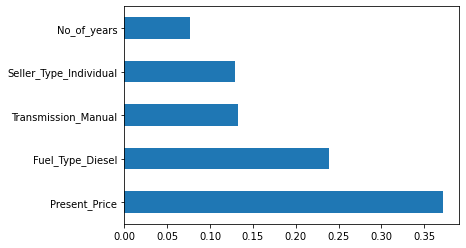

In [30]:
#visaulization graph for feaure importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [32]:
X_train.shape

(240, 8)

# Model

In [33]:
from sklearn.linear_model import LinearRegression

# Linear Regression

In [34]:
#Prepare a Linear Regression Model
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8986723467021667

# Decision Tree Regression

In [35]:
#Prepairng a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.8570185665599515

# Random Forest Regression

In [36]:
#Preparing Random Forest REgression
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.8294214341725481

# Predictions

In [37]:
predictions=reg.predict(X_test)
predictions

array([ 8.2444664 ,  7.71302187, -0.9955834 ,  1.78691946,  5.7900386 ,
        0.96558411, 11.3716032 ,  7.45695689, -3.17135799,  5.06994372,
        2.10869671,  7.17692413,  1.5798463 , -3.41608896, 20.19021789,
        1.73641324,  6.19109941, 16.96830542,  6.25506532, -0.52802663,
        3.77919548,  8.09512855,  6.80573812, -0.3718088 ,  8.69626818,
        7.18379995,  3.49799972,  0.39513481,  1.25969302,  4.56111219,
        1.15502464, -1.02054653,  7.69330158,  5.11892883, -2.19153244,
        1.93479627,  9.4829318 , 10.02632942, 14.77516633,  4.74803287,
        3.00403544,  2.75042819,  1.41634784,  2.06580126,  8.92563023,
       16.86574037,  3.91112379,  6.10633659,  0.45819866, 18.51654367,
        6.7460088 ,  6.52261123,  5.32133574,  0.03774874,  0.02691162,
        7.63322655, 10.40315015, 10.34453782,  3.94772885,  0.08841006,
        0.30698123])

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

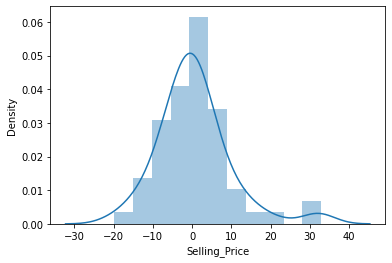

In [38]:
sns.distplot(y_test-predictions)

This graph shows the bell shape curve which means our predictions are very much well.

In [39]:
#calculate MAE, MSE, RMSE
from sklearn import metrics

In [40]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 6.38502649523977
MSE: 87.15554987879061
RMSE: 9.335713678063966


**Save the model using Pickle module**

In [42]:
import pickle

pickle.dump(RForest, open('rf_model.pkl','wb'))